In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
import sklearn.linear_model
from sklearn.metrics import confusion_matrix

In [163]:
# Titanic Dataset
train = pd.read_csv(r'C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics/Assignment 1/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [164]:
# 1) Data cleaning
    # 1.1) Drop duplicates
train = train.drop_duplicates()
"""0 duplicates """
    # 1.2) Missing values
train.isnull().sum() 
"""
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
"""
    # 1.2.1) Fill numerical attributes with average (Age)
train = train.fillna(train.mean())
    # 1.2.2) Fill categorical attributes with Unknown (Cabin, Embarked)
train['Embarked'].unique()
train = train.fillna('Unknown')

    # 1.3) Expanding categorical data
    # Numerical features
numeric_features = [train['Age'], train['Fare'], train['SibSp'], train['Parch']]
    # Categorical Features
categorical_features = [train['Pclass'], train['Sex'], train['Embarked']]

Sex = pd.get_dummies(train["Sex"], prefix='Sex')
Embarked = pd.get_dummies(train["Embarked"], prefix='Embarked')
Pclass = pd.get_dummies(train["Pclass"], prefix='Pclass')
train = pd.concat([train, Pclass, Sex, Embarked], axis = 1)
train.drop(["PassengerId", "Cabin", "Pclass", "Name", "Sex", "Ticket", "Embarked"], axis = 1, inplace= True)
train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1,0
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1,0
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1,0
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1,0
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0,0


In [165]:
# 2) Logistic regression modeling
# Features X
X = train.drop("Survived",axis=1)
# Target y
y = train["Survived"]

# Split train:test to 7:3, It's standard ratio in any dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Apply logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# Confusion matrix & Classification report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# **F1-score = balance of precision and recall, Support = actual occurence of true responses

[[136  18]
 [ 39  75]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.66      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



C:\Users\PornpatSamartlertdee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'SVM Decision Region Boundary')

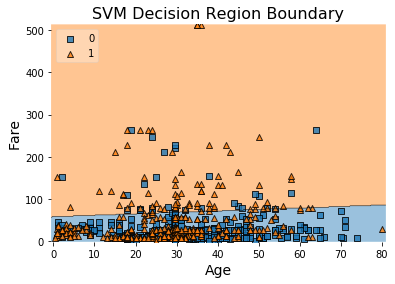

In [166]:
# 3) Plot decision boundary using SVM
# Features X
X = train[['Age', 'Fare']]
# Target y
y = train["Survived"]

from mlxtend.plotting import plot_decision_regions
clf = svm.SVC(kernel='linear')
clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [167]:
# Car's Mile/Gallon Dataset
cars1 = pd.read_csv(r'C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics/Assignment 1/car_mpg_predict-master/cars1.csv')
cars2 = pd.read_csv(r'C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics/Assignment 1/car_mpg_predict-master/cars2.csv')
cars1.drop(cars1.columns[9:],axis=1,inplace=True)  
train = cars1.append(cars2)
train

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


In [168]:
# 1) Data cleaning
    # 1.1) Drop duplicates
train = train.drop_duplicates()
"""0 duplicates """
    # 1.2) Missing values
train.isnull().sum() 
"""
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64
"""
    # 1.3) Expanding categorical data
    # Numerical features
numeric_features = [train['mpg'], train['displacement'], train['weight'], train['acceleration']]
    # Categorical Features
categorical_features = [train['cylinders'], train['model'], train['origin']]

Cylinders = pd.get_dummies(train["cylinders"], prefix='cylinders')
Model = pd.get_dummies(train["model"], prefix='model')
Origin = pd.get_dummies(train["origin"], prefix='origin')
train = pd.concat([train, Cylinders, Model, Origin], axis = 1)
train.drop(["car", "cylinders", "model", "origin"], axis = 1, inplace= True)
train

,mpg,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,model_76,model_77,model_78,model_79,model_80,model_81,model_82,origin_1,origin_2,origin_3
0,18.0,307,130,3504,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,15.0,350,165,3693,11.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,18.0,318,150,3436,11.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,16.0,304,150,3433,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,17.0,302,140,3449,10.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,27.0,140,86,2790,15.6,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
196,44.0,97,52,2130,24.6,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
197,32.0,135,84,2295,11.6,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
198,28.0,120,79,2625,18.6,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
# 2) ???